In [1]:
from utils import Portfolio
import pandas as pd 
from IPython.display import display

In [2]:
nifty_df = pd.read_csv('nifty_500.csv')
nifty_df.head()

,Company Name,Industry,Symbol,Series,ISIN Code
0,3M India,Diversified,3MINDIA,EQ,INE470A01017
1,ABB India,Capital Goods,ABB,EQ,INE117A01022
2,ACC,Construction Materials,ACC,EQ,INE012A01025
3,AIA Engineering,Capital Goods,AIAENG,EQ,INE212H01026
4,APL Apollo Tubes,Capital Goods,APLAPOLLO,EQ,INE702C01027


In [3]:
stocks = nifty_df['Symbol'].tolist()

In [4]:
portfolio = Portfolio(stocks=stocks)

[*********************100%***********************]  500 of 500 completed


# Efficient portfolio frontier:

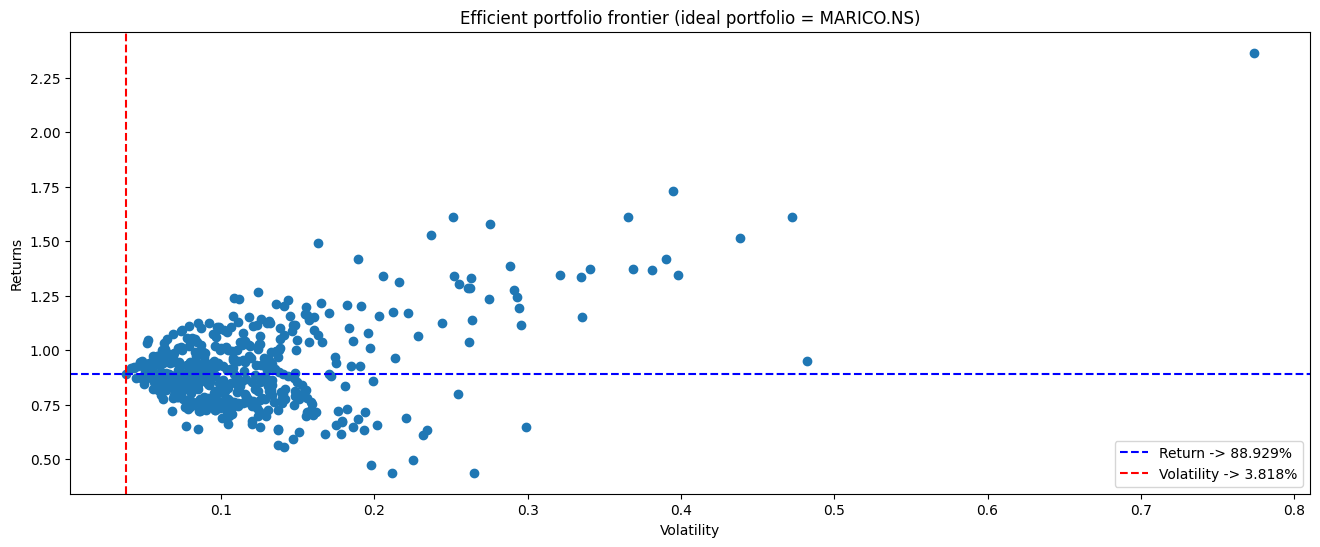

In [5]:
portfolio.see_frontier()

# Descriptive statistics about the portfolio

In [6]:
info = portfolio.describe()

  Sharpe Ratio    Treynors Ratio    Jensens Alpha    Information Ratio
--------------  ----------------  ---------------  -------------------
       4571.64           191.102         -46.2216             -1946.16


# Clustering for portfolio optimization 

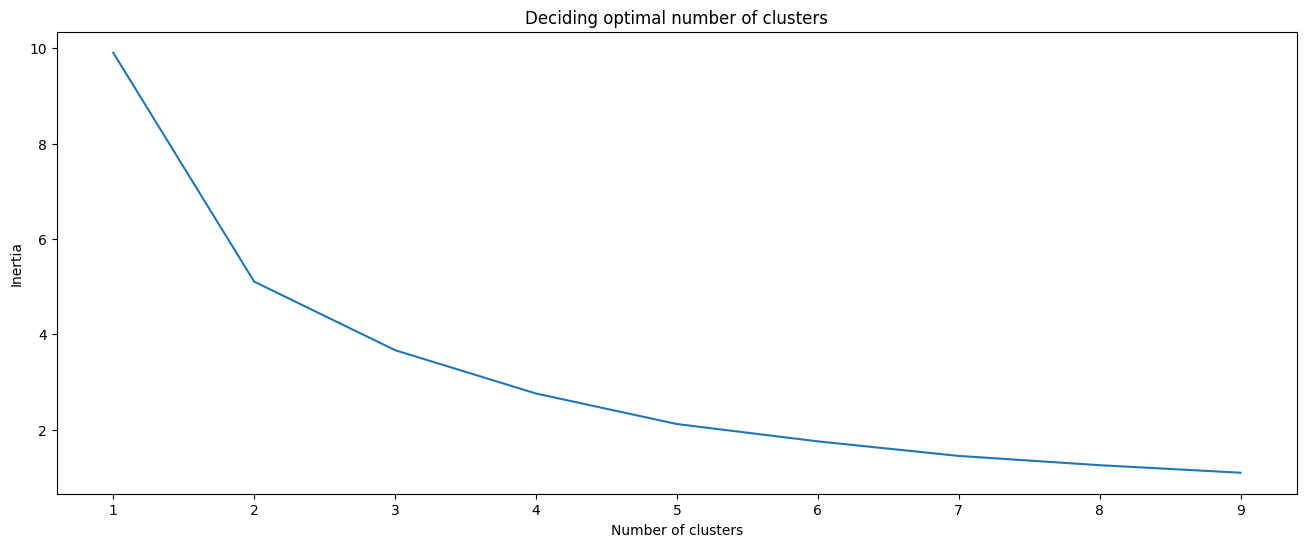

In [7]:
portfolio.find_clusters()

In [8]:
# From this graph, we can see that 5 clusters are optimal for portfolio diversification 
portfolio.cluster(k=5)

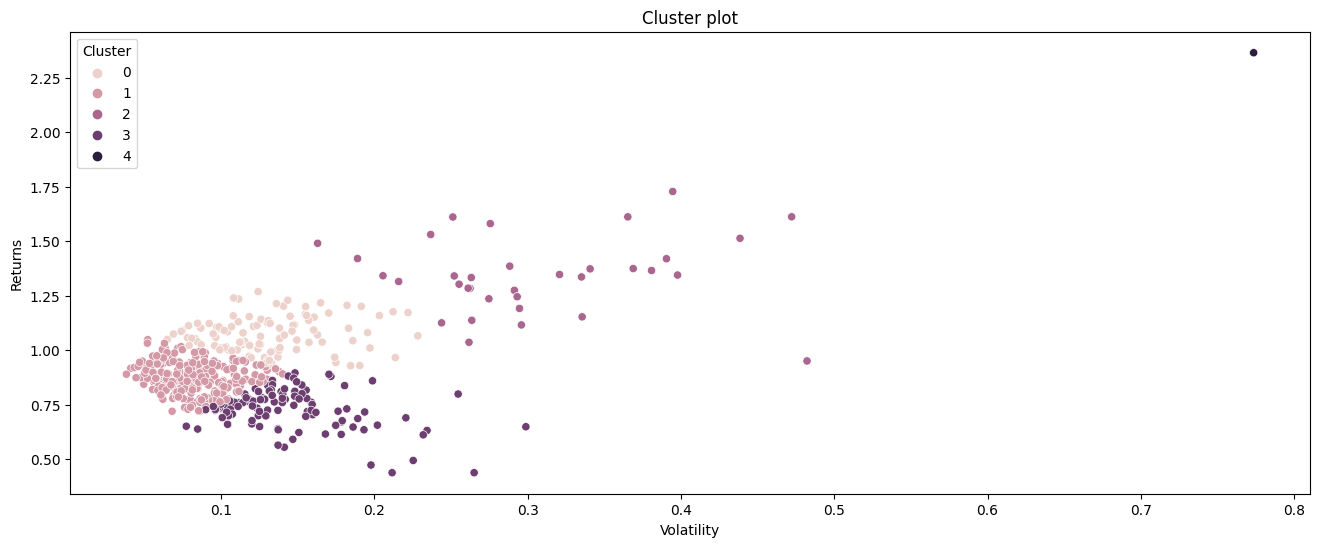

In [9]:
portfolio.visualize_clusters()

In [10]:
summary_df = portfolio.cluster_df.copy()
summary_df['Sector'] = nifty_df['Industry']
for cluster in summary_df['Cluster'].unique():
    cluster_df = summary_df[summary_df['Cluster'] == cluster]
    print(f'Cluster -> {cluster}')
    display(cluster_df.head(5))

Cluster -> 1


,Symbol,Returns,Volatility,Cluster,Sector
0,3MINDIA.NS,0.862991,0.090999,1,Diversified
2,ACC.NS,0.974426,0.058579,1,Construction Materials
5,AUBANK.NS,1.008487,0.071700,1,Financial Services
6,AARTIDRUGS.NS,0.756390,0.087666,1,Healthcare
7,AAVAS.NS,0.837504,0.110844,1,Financial Services


Cluster -> 2


,Symbol,Returns,Volatility,Cluster,Sector
1,ABB.NS,1.314433,0.215821,2,Capital Goods
9,ADANIENT.NS,1.365026,0.380803,2,Metals & Mining
10,ADANIGREEN.NS,1.610959,0.365328,2,Power
12,ATGL.NS,1.611277,0.472229,2,Oil Gas & Consumable Fuels
13,ADANITRANS.NS,1.419036,0.390541,2,Power


Cluster -> 0


,Symbol,Returns,Volatility,Cluster,Sector
3,AIAENG.NS,1.069646,0.162883,0,Capital Goods
4,APLAPOLLO.NS,1.098490,0.098774,0,Capital Goods
14,ABCAPITAL.NS,1.019766,0.095796,0,Financial Services
15,ABFRL.NS,1.058300,0.096504,0,Consumer Services
18,AEGISCHEM.NS,1.005388,0.124008,0,Oil Gas & Consumable Fuels


Cluster -> 3


,Symbol,Returns,Volatility,Cluster,Sector
16,ABSLAMC.NS,0.732362,0.099312,3,Financial Services
27,AMBER.NS,0.816368,0.155453,3,Consumer Durables
46,BSE.NS,0.648329,0.298819,3,Financial Services
69,BIRLACORPN.NS,0.790536,0.148859,3,Construction Materials
84,CSBBANK.NS,0.740742,0.107249,3,Financial Services


Cluster -> 4


,Symbol,Returns,Volatility,Cluster,Sector
448,TTML.NS,2.363701,0.773651,4,Telecommunication
